<a href="https://colab.research.google.com/github/yuvrajrajput/machine-learning-with-me/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.tree import export_graphviz,plot_tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import collections

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
json_string = '{"State":{"0":"California","1":"Colorado","2":"Connecticut","3":"Delaware","4":"D.C.","5":"Hawaii","6":"Illinois","7":"Maine","8":"Maryland","9":"Massachusetts","10":"Michigan","11":"Minnesota","12":"Nevada","13":"New Hampshire","14":"New Jersey","15":"New Mexico","16":"New York","17":"Oregon","18":"Rhode Island","19":"Vermont","20":"Virginia","21":"Washington","22":"Pennsylvania","23":"Wisconsin","24":"Alabama","25":"Alaska","26":"Arizona","27":"Arkansas","28":"Florida","29":"Georgia","30":"Idaho","31":"Indiana","32":"Iowa","33":"Kansas","34":"Kentucky","35":"Louisiana","36":"Mississippi","37":"Missouri","38":"Montana","39":"Nebraska","40":"North Carolina","41":"North Dakota","42":"Ohio","43":"Oklahoma","44":"South Carolina","45":"South Dakota","46":"Tennessee","47":"Texas","48":"Utah","49":"West Virginia","50":"Wyoming"},"Median_income":{"0":70489,"1":73034,"2":72812,"3":65012,"4":85750,"5":80108,"6":70145,"7":58663,"8":86223,"9":86345,"10":60449,"11":71817,"12":61864,"13":81346,"14":74176,"15":48283,"16":67274,"17":69165,"18":62266,"19":70066,"20":77151,"21":79726,"22":64524,"23":62629,"24":49936,"25":68734,"26":62283,"27":49781,"28":54644,"29":55821,"30":58728,"31":59892,"32":68718,"33":63938,"34":54555,"35":49973,"36":42781,"37":61726,"38":57679,"39":67575,"40":53369,"41":66505,"42":61633,"43":54434,"44":57444,"45":59463,"46":56060,"47":59785,"48":77067,"49":50573,"50":62539},"%_Bachelors_degree_or_higher":{"0":0.33,"1":0.39,"2":0.38,"3":0.31,"4":0.57,"5":0.32,"6":0.33,"7":0.3,"8":0.39,"9":0.42,"10":0.28,"11":0.35,"12":0.24,"13":0.36,"14":0.38,"15":0.27,"16":0.35,"17":0.32,"18":0.33,"19":0.37,"20":0.38,"21":0.35,"22":0.3,"23":0.29,"24":0.25,"25":0.29,"26":0.28,"27":0.22,"28":0.29,"29":0.3,"30":0.27,"31":0.25,"32":0.28,"33":0.32,"34":0.23,"35":0.23,"36":0.21,"37":0.28,"38":0.31,"39":0.31,"40":0.3,"41":0.29,"42":0.27,"43":0.25,"44":0.27,"45":0.28,"46":0.26,"47":0.29,"48":0.33,"49":0.2,"50":0.27},"%_White":{"0":0.37,"1":0.68,"2":0.66,"3":0.62,"4":0.37,"5":0.21,"6":0.61,"7":0.93,"8":0.5,"9":0.71,"10":0.75,"11":0.8,"12":0.49,"13":0.9,"14":0.55,"15":0.37,"16":0.55,"17":0.75,"18":0.72,"19":0.93,"20":0.62,"21":0.68,"22":0.76,"23":0.81,"24":0.66,"25":0.6,"26":0.54,"27":0.72,"28":0.53,"29":0.52,"30":0.82,"31":0.79,"32":0.86,"33":0.76,"34":0.85,"35":0.59,"36":0.57,"37":0.8,"38":0.86,"39":0.79,"40":0.63,"41":0.84,"42":0.79,"43":0.65,"44":0.64,"45":0.82,"46":0.74,"47":0.41,"48":0.78,"49":0.92,"50":0.84},"Political_Leaning":{"0":0,"1":0,"2":0,"3":0,"4":0,"5":0,"6":0,"7":0,"8":0,"9":0,"10":0,"11":0,"12":0,"13":0,"14":0,"15":0,"16":0,"17":0,"18":0,"19":0,"20":0,"21":0,"22":2,"23":2,"24":1,"25":1,"26":1,"27":1,"28":1,"29":1,"30":1,"31":1,"32":1,"33":1,"34":1,"35":1,"36":1,"37":1,"38":1,"39":1,"40":1,"41":1,"42":1,"43":1,"44":1,"45":1,"46":1,"47":1,"48":1,"49":1,"50":1}}'
df = pd.read_json(json_string)

In [ ]:
df

,State,Median_income,%_Bachelors_degree_or_higher,%_White,Political_Leaning
24,Alabama,49936,0.25,0.66,1
25,Alaska,68734,0.29,0.60,1
26,Arizona,62283,0.28,0.54,1
27,Arkansas,49781,0.22,0.72,1
0,California,70489,0.33,0.37,0
1,Colorado,73034,0.39,0.68,0
2,Connecticut,72812,0.38,0.66,0
4,D.C.,85750,0.57,0.37,0
3,Delaware,65012,0.31,0.62,0
28,Florida,54644,0.29,0.53,1


In [ ]:
df['income'] = df['Median_income']>df['Median_income'].median()
df['education'] = df['%_Bachelors_degree_or_higher']>df['%_Bachelors_degree_or_higher'].median()
df['diversity'] = df['%_White']<df['%_White'].median()
df

,State,Median_income,%_Bachelors_degree_or_higher,%_White,Political_Leaning,income,education,diversity
24,Alabama,49936,0.25,0.66,1,False,False,True
25,Alaska,68734,0.29,0.60,1,True,False,True
26,Arizona,62283,0.28,0.54,1,False,False,True
27,Arkansas,49781,0.22,0.72,1,False,False,False
0,California,70489,0.33,0.37,0,True,True,True
1,Colorado,73034,0.39,0.68,0,True,True,True
2,Connecticut,72812,0.38,0.66,0,True,True,True
4,D.C.,85750,0.57,0.37,0,True,True,True
3,Delaware,65012,0.31,0.62,0,True,True,True
28,Florida,54644,0.29,0.53,1,False,False,True


In [ ]:
feature_cols = ['income','education',	'diversity']
X = df[feature_cols] # Features
y = df.Political_Leaning # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

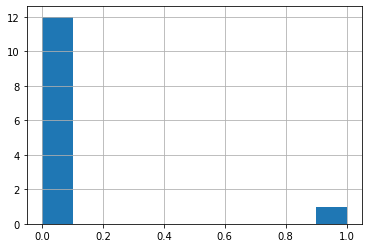

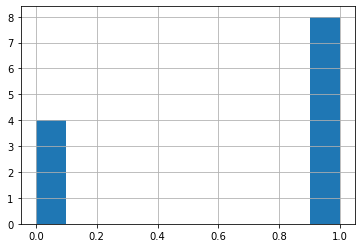

In [ ]:
y_train[X_train['education']==1].hist()
plt.show()
y_train[X_train['education']==0].hist()
plt.show()

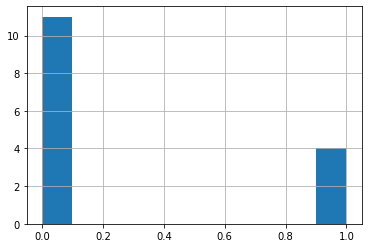

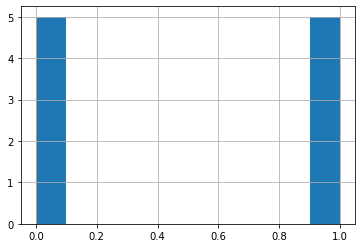

In [ ]:
y_train[X_train['diversity']==1].hist()
plt.show()
y_train[X_train['diversity']==0].hist()
plt.show()

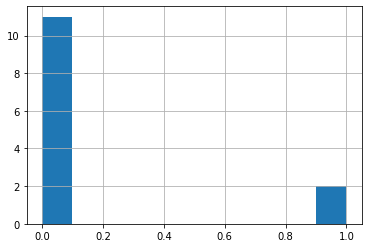

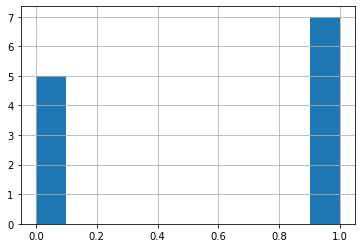

In [ ]:
y_train[X_train['income']==1].hist()
plt.show()
y_train[X_train['income']==0].hist()
plt.show()

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
#clf = clf.fit(X_train,y_train)
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8076923076923077


[Text(186.0, 190.26, 'X[1] <= 0.5\ngini = 0.461\nsamples = 25\nvalue = [16, 9]'),
 Text(111.60000000000001, 135.9, 'X[0] <= 0.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(74.4, 81.53999999999999, 'X[2] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(37.2, 27.180000000000007, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(111.60000000000001, 27.180000000000007, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(148.8, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(260.40000000000003, 135.9, 'X[2] <= 0.5\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(223.20000000000002, 81.53999999999999, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(186.0, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(260.40000000000003, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(297.6, 81.53999999999999, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]')]

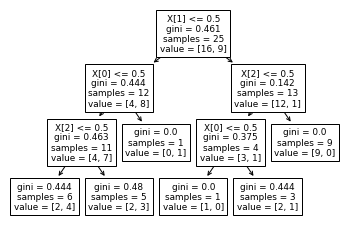

In [ ]:
plot_tree(clf)

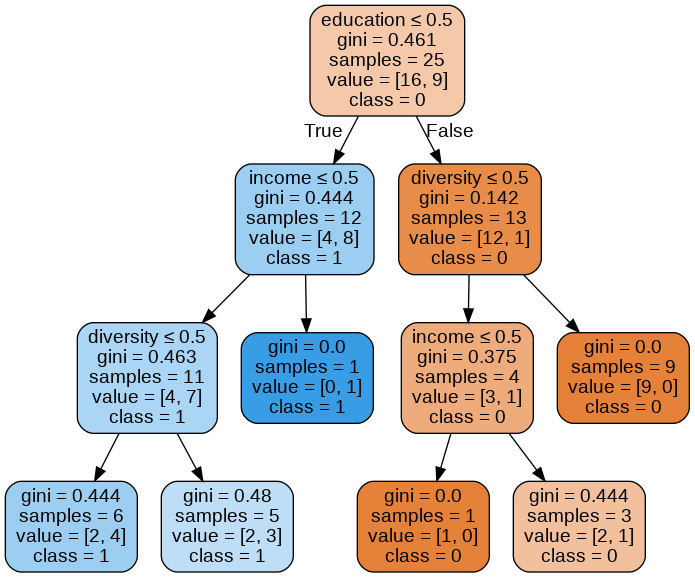

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('redblue.png')
Image(graph.create_png())